In [1]:
!wget https://github.com/omkar3602/pnemonia-detection-dataset/raw/master/chest_xray.zip

--2022-06-11 17:17:08--  https://github.com/omkar3602/pnemonia-detection-dataset/raw/master/chest_xray.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/omkar3602/pnemonia-detection-dataset/master/chest_xray.zip [following]
--2022-06-11 17:17:08--  https://media.githubusercontent.com/media/omkar3602/pnemonia-detection-dataset/master/chest_xray.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225655214 (1.1G) [application/zip]
Saving to: ‘chest_xray.zip’

chest_xray.zip      100%[===================>]   1.14G   263MB/s    in 4.3s    

2022-06-11 17:17:26 (270 MB/s) - ‘chest_

In [2]:
!unzip chest_xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xra

In [3]:
import pickle
import random
import numpy as np
import cv2
import os

In [4]:
TRAIN_DIR = "chest_xray/train"
# VALID_DIR = "chest_xray/val"
TEST_DIR = "chest_xray/test"

In [5]:
classes = ["NORMAL", "PNEUMONIA"]

In [6]:
img_size = 150

In [7]:
def create_data(DIR):
    data = []
    for category in classes:
        path = os.path.join(DIR, category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([img_arr, class_num])

    return data

train_data = create_data(TRAIN_DIR)
# valid_data = create_data(VALID_DIR)
test_data = create_data(TEST_DIR)

In [8]:
print("\n\nNumber of images in Training Dataset : ", len(train_data))
# print("\n\nNumber of images in Validation Dataset : ", len(valid_data))
print("\n\nNumber of images in Test Dataset : ", len(test_data))



Number of images in Training Dataset :  5216


Number of images in Test Dataset :  624


In [9]:
random.shuffle(train_data)
# random.shuffle(valid_data)
random.shuffle(test_data)

In [10]:
def preprocess_and_populate_data(source_data):
    X_data = []
    y_data = []
    for features, label in source_data:
        X_data.append(features)
        y_data.append(label)
    X_data = np.array(X_data).reshape(-1, img_size, img_size, 1)
    X_data = X_data / 255.

    X_data = np.array(X_data)
    y_data = np.array(y_data)
    return X_data, y_data

X_train, y_train = preprocess_and_populate_data(train_data)
# X_valid, y_valid = preprocess_and_populate_data(valid_data)
X_test, y_test = preprocess_and_populate_data(test_data)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= True)

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Activation , BatchNormalization , Input , Dropout
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy

In [13]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , input_shape = X_train.shape[1:] , activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64 , (3,3) , activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128 , (3,3) , activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64 , kernel_initializer='uniform' , activation="relu"))
model.add(Dense(128 , kernel_initializer='uniform', activation="relu"))
model.add(Dense(64 , kernel_initializer='uniform', activation="relu"))
model.add(Dense(1 , kernel_initializer='uniform', activation="sigmoid"))

model.compile( loss = "binary_crossentropy",
                  optimizer = "adam" ,
                  metrics = ["accuracy"]
                 )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 15, validation_data = (X_valid, y_valid))

Epoch 1/15
94/94 [==============================] - 16s 44ms/step - loss: 0.4310 - accuracy: 0.7831 - val_loss: 0.1360 - val_accuracy: 0.9425
Epoch 2/15
94/94 [==============================] - 3s 36ms/step - loss: 0.1603 - accuracy: 0.9359 - val_loss: 0.0859 - val_accuracy: 0.9693
Epoch 3/15
94/94 [==============================] - 3s 36ms/step - loss: 0.1186 - accuracy: 0.9523 - val_loss: 0.0612 - val_accuracy: 0.9770
Epoch 4/15
94/94 [==============================] - 3s 36ms/step - loss: 0.0916 - accuracy: 0.9663 - val_loss: 0.0530 - val_accuracy: 0.9808
Epoch 5/15
94/94 [==============================] - 3s 36ms/step - loss: 0.0941 - accuracy: 0.9672 - val_loss: 0.0889 - val_accuracy: 0.9847
Epoch 6/15
94/94 [==============================] - 3s 36ms/step - loss: 0.0696 - accuracy: 0.9744 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 7/15
94/94 [==============================] - 3s 36ms/step - loss: 0.0581 - accuracy: 0.9791 - val_loss: 0.0387 - val_accuracy: 0.9808
Epoch 8/15
9

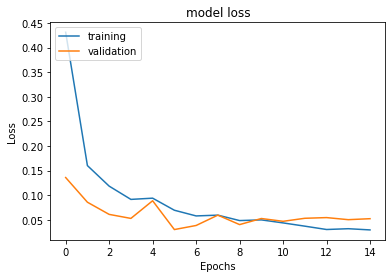

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

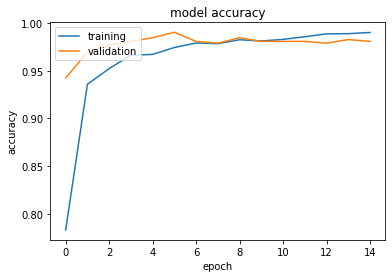

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [17]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

20/20 [==============================] - 0s 15ms/step - loss: 1.3491 - accuracy: 0.7500


In [18]:
model.save('pneumonia_detector.h5')

In [35]:
def detect(model, image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (150, 150))
    img = np.array(img).reshape(-1, img_size, img_size, 1)
    img = img / 255.
    img = np.array(img)

    pred = model.predict([ img ])
    return 1 if pred[0][0]>0.5 else 0

In [47]:
import matplotlib.pyplot as plt

def predict_and_plot(model, image_path, actual_class, classes):
    pred = detect(model, image_path)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img)
    plt.title(f"Prediction: {classes[pred]}\nActual: {actual_class}")
    plt.axis(False)

In [28]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_detector.h5')

'chest_xray/test/PNEUMONIA/person175_bacteria_834.jpeg'

In [53]:
random_category = np.random.choice(classes)
random_image = np.random.choice(os.listdir(os.path.join(TEST_DIR, random_category)))

path = os.path.join(TEST_DIR, random_category, random_image)
path

'chest_xray/test/PNEUMONIA/person3_virus_15.jpeg'

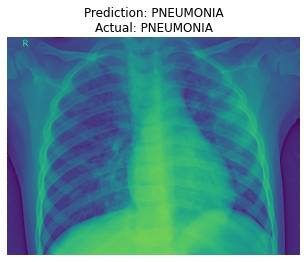

In [54]:
predict_and_plot(model, path, random_category, classes)